# 【课程3.6】  基本图表绘制 plt.plot()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

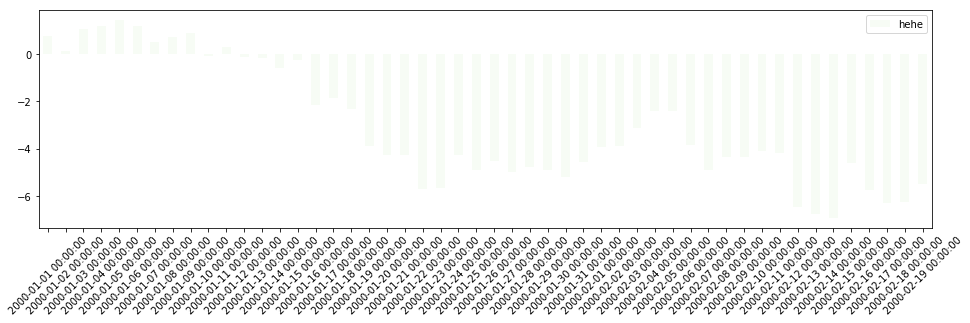

In [24]:
ts = pd.Series(np.random.randn(50), index=pd.date_range('1/1/2000', periods=50))
ts = ts.cumsum()
ts.plot(figsize=(16,4), use_index=True, rot=45, 
        kind='bar', label='hehe', legend=True, colormap='Greens')

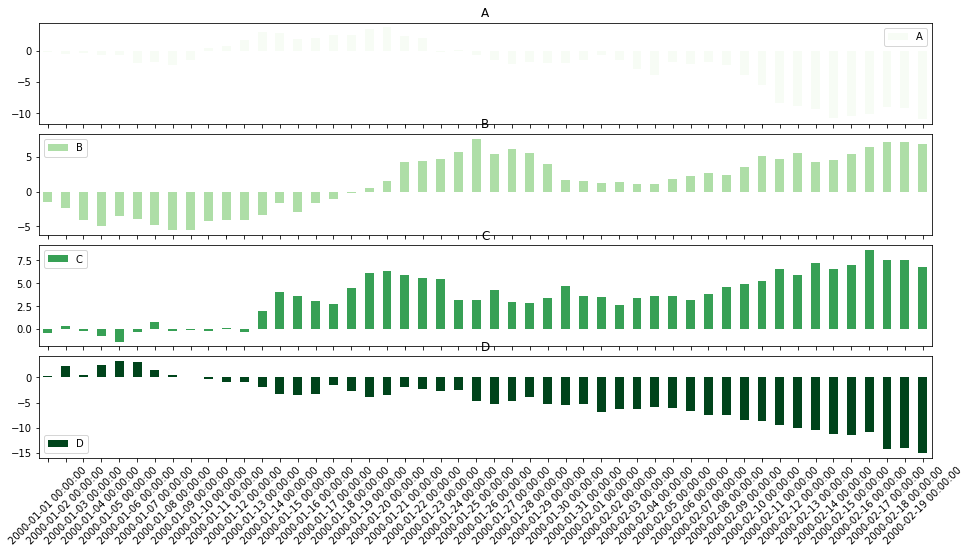

In [37]:
df = pd.DataFrame(np.random.randn(50, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(figsize=(16,8), use_index=True, rot=45, subplots=True,
        kind='bar', label='hehe', legend=True, colormap='Greens')
plt.subplots_adjust(hspace=0.1)

# 【课程3.7】  柱状图、堆叠图




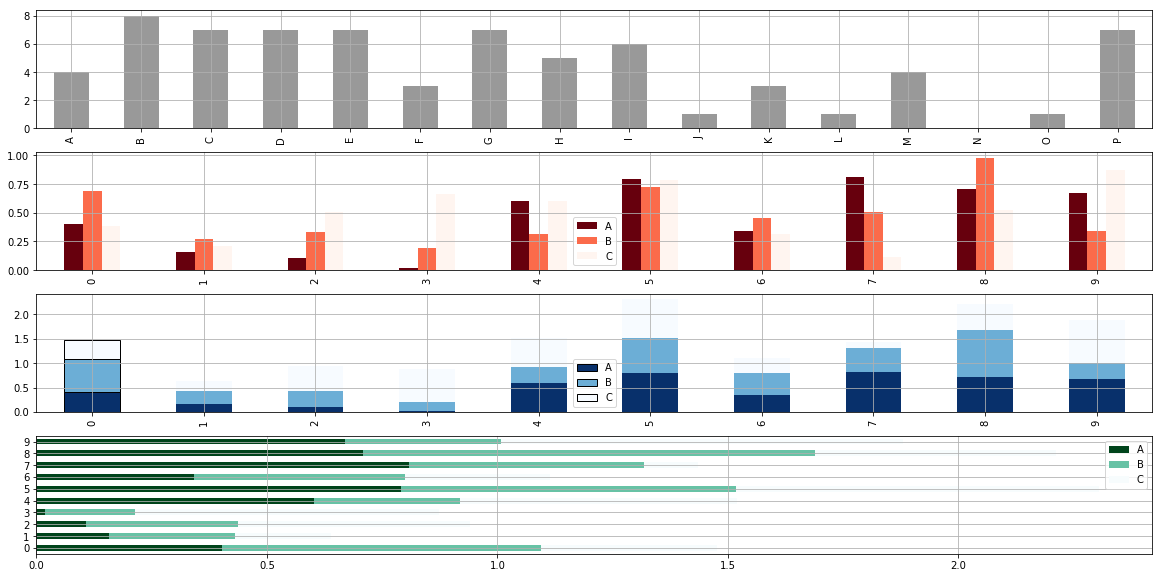

In [46]:
fig, axes = plt.subplots(4, 1, figsize=(20,10))
ps = pd.Series(np.random.randint(0, 10, 16), index=list('ABCDEFGHIJKLMNOP'))
df = pd.DataFrame(np.random.rand(10,3), columns=list('ABC'))
# print(ps); print(); print(df)

ps.plot(ax=axes[0], kind='bar', color='k', grid=True, alpha=0.4)
df.plot(ax=axes[1], kind='bar', colormap='Reds_r', grid=True)
df.plot(ax=axes[2], kind='bar', colormap='Blues_r', grid=True, stacked=True, edgecolor='Black')
df.plot.barh(ax=axes[3], grid=True, stacked=True, colormap='BuGn_r')

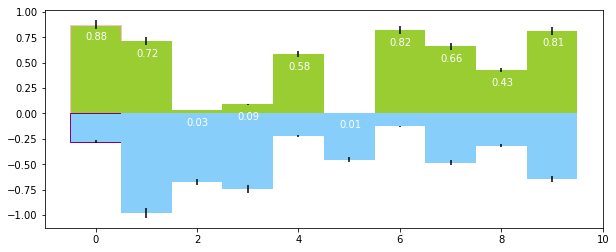

In [73]:
plt.figure(figsize=(10,4))
x = np.arange(10)
y1 = np.random.rand(10)
y2 = -np.random.rand(10)

plt.bar(x, y1, width=1, facecolor='yellowgreen', edgecolor='pink', yerr=y1*0.05)
plt.bar(x, y2, width=1, facecolor='lightskyblue', edgecolor='purple', yerr=y2*0.05)

for i, j in zip(x, y1):
    plt.text(i-0.2, j-0.15, '{:.2f}'.format(j), color='white')

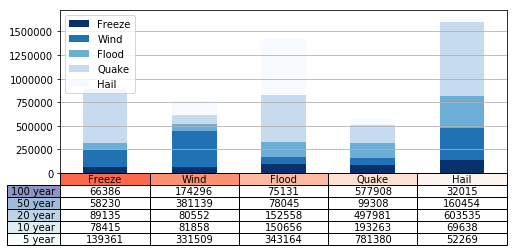

In [103]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
cols = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]
df = pd.DataFrame(data,columns=cols, index=['%d year' % x for x in (100, 50, 20, 10, 5)])
df.plot(kind='bar',grid = True,colormap='Blues_r',stacked=True,figsize=(8,3))
plt.legend(loc=2)
plt.xticks([])

plt.table(cellText=data,
          cellLoc='center',
          cellColours=None,
          rowLabels=rows,
          rowColours=plt.cm.BuPu(np.linspace(0, 0.5, 5))[::-1],
          colLabels=cols,
          colColours=plt.cm.Reds(np.linspace(0, 0.5, 5))[::-1],
          rowLoc='right',
          loc='bottom')

# 【课程3.8】  面积图、填图、饼图

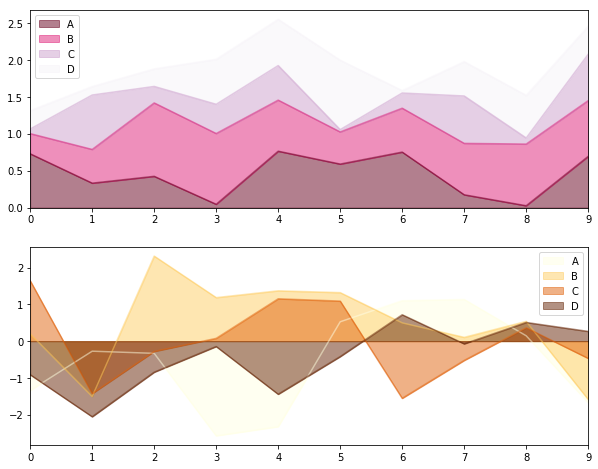

In [112]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))
df_1 = pd.DataFrame(np.random.rand(10, 4), columns=list('ABCD'))
df_2 = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

df_1.plot.area(colormap='PuRd_r', alpha=0.5, ax=axes[0])
df_2.plot.area(colormap='YlOrBr', alpha=0.5, ax=axes[1], stacked=False)
# stacked：是否堆叠，默认情况下，区域图被堆叠
# 为了产生堆积面积图，每列必须是正值或全部负值！
# 当数据有NaN时候，自动填充0，所以图标签需要清洗掉缺失值

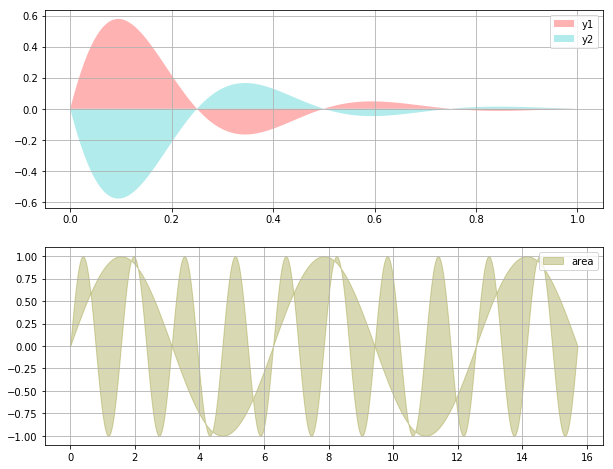

In [140]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

x = np.linspace(0, 1, 500)
y1 = np.sin(4 * np.pi * x) * np.exp(-5 * x)
y2 = -np.sin(4 * np.pi * x) * np.exp(-5 * x)
axes[0].fill(x, y1, 'r', alpha=0.3, label='y1')
axes[0].fill(x, y2, 'c', alpha=0.3, label='y2')

x = np.linspace(0, 5*np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(4*x)
axes[1].fill_between(x, y1, y2, color='olive', alpha=0.3, label='area')

for i in range(2):
    axes[i].legend(loc=0)
    axes[i].grid()

([<matplotlib.patches.Wedge at 0x135645390>,
 [Text(-1.5428,0.825995,'A'),
  Text(-1.58474,-1.45296,'B'),
  Text(-0.0164428,-1.64992,'C'),
  Text(1.84652,0.626774,'D')],
 [Text(-0.8816,0.471997,'34.35%'),
  Text(-1.03192,-0.946115,'4.91%'),
  Text(-0.00896877,-0.899955,'21.15%'),
  Text(1.13632,0.385707,'39.58%')])

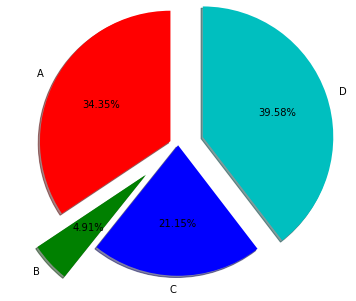

In [197]:
s = pd.Series(3*np.random.rand(4), index=list('ABCD'), name='series')
plt.axis('equal')
plt.pie(s, explode=[0.1,0.5,0,0.3], colors=['r','g','b','c'], labels=s.index,
       autopct='%.2f%%', pctdistance=0.6, labeldistance=1.1,
       shadow=True, startangle=90, radius=1.5, frame=False)

# 【课程3.9】  直方图

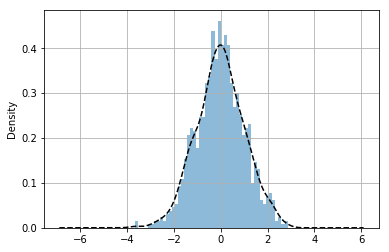

In [3]:
s = pd.Series(np.random.randn(1000))
s.hist(bins=50,
       histtype='bar',
       align='mid',
       orientation='vertical',
       alpha=0.5,
       normed=True)
s.plot(kind='kde', style='k--', grid=True)

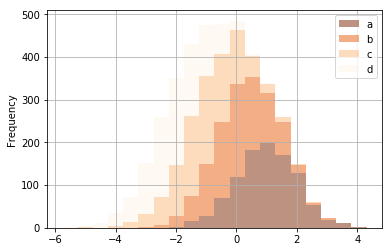

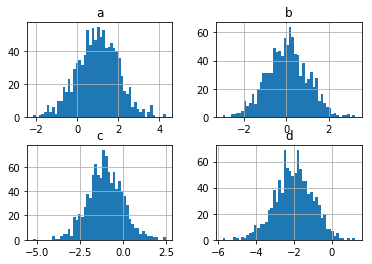

In [7]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1, 'd': np.random.randn(1000)-2},
                   columns=['a', 'b', 'c','d'])
df.plot.hist(bins=20,colormap='Oranges_r',alpha=0.5,stacked=True,grid=True)
df.hist(bins=50)

# 【课程3.10】  散点图、矩阵散点图

/Users/Ji-personal/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


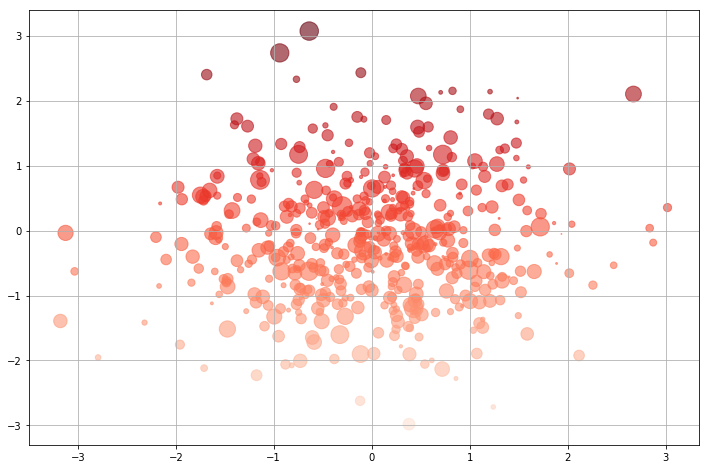

In [18]:
plt.figure(figsize=(12, 8))
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y, marker='.', s=np.random.randn(1000)*500, 
            cmap='Reds', c=y, alpha=0.6)
# 以城市空间为例，xy代表经纬度，s代表第三个维度(点的大小)，c代表第四个维度(点的颜色)
# 或者，x代表日期，y代表时刻，s代表第三个维度，c代表第四个维度(点的颜色)
plt.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16be4cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a170b79b0>]], dtype=object)

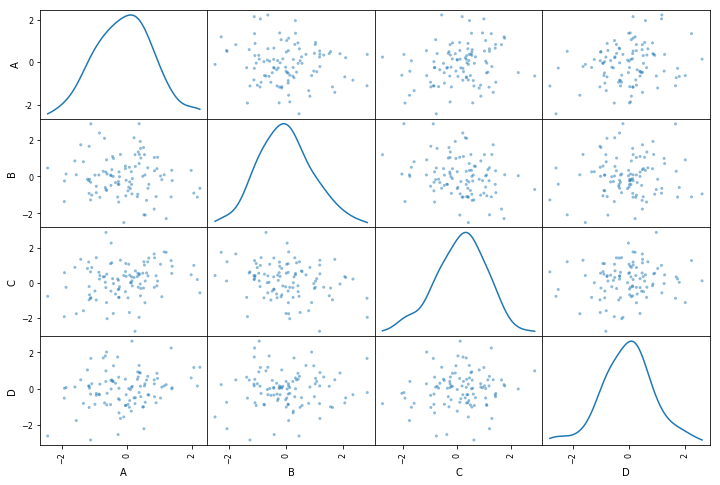

In [25]:
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
pd.plotting.scatter_matrix(df, figsize=(12, 8), marker='.', alpha=0.5,
                           diagonal='kde', range_padding=0.1, grid=True)
# diagonal：({‘hist’, ‘kde’})，必须且只能在{‘hist’, ‘kde’}中选择1个 → 每个指标的频率图
# range_padding：(float, 可选)，图像在x轴、y轴原点附近的留白(padding)，该值越大，留白距离越大，图像远离坐标原点

# 【课程3.11】  极坐标图

0    0
1    1
2    2
3    3
4    4
dtype: int64

[ 6.1   6.12  6.14  6.16  6.18  6.2   6.22  6.24  6.26  6.28]


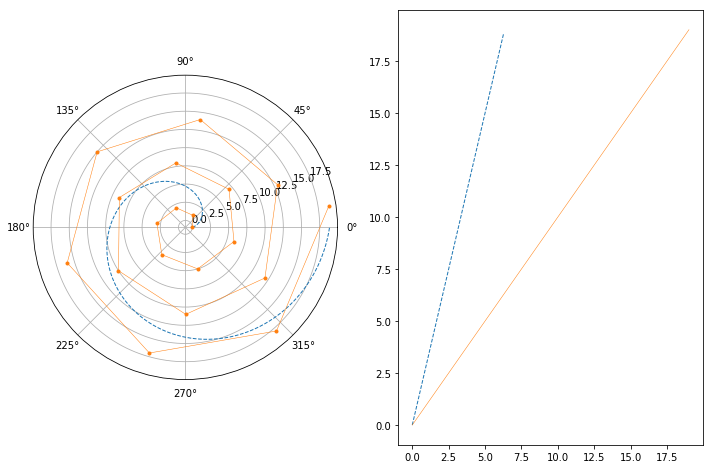

In [39]:
s = pd.Series(np.arange(20))
theta = np.arange(0, 2*np.pi, 0.02)
print(s.head()); print(); print(theta[-10:])

fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122)

ax1.plot(theta, theta*3, linestyle='--', lw=1)
ax1.plot(s, linestyle='-', marker='.', lw=0.5)
ax2.plot(theta, theta*3, linestyle='--', lw=1)
ax2.plot(s, lw=0.5)

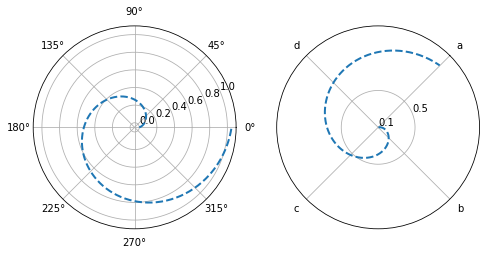

In [56]:
theta=np.arange(0,2*np.pi,0.02)
plt.figure(figsize=(8,4))
ax1= plt.subplot(121, projection='polar')
ax2= plt.subplot(122, projection='polar')
ax1.plot(theta,theta/6,'--',lw=2)
ax2.plot(theta,theta/6,'--',lw=2)

ax2.set_theta_direction(-1)
ax2.set_thetagrids(np.arange(0.0, 360.0, 90),['a','b','c','d'])
ax2.set_rgrids(np.arange(0.2, 2, 0.3))
ax2.set_theta_offset(np.pi/4)

ax2.set_rlim(0.4,0.8)
ax2.set_rmax(1.2)
ax2.set_rticks(np.arange(0.1, 0.6, 0.4))

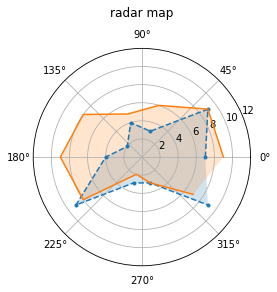

In [67]:
plt.figure(figsize=(8,4))

ax1 = plt.subplot(111, projection='polar')
ax1.set_title('radar map\n')  # 创建标题
ax1.set_rlim(0,12)

data1 = np.random.randint(1, 10, 10)
data2 = np.random.randint(1, 10, 10)
theta=np.arange(0, 2*np.pi, 2*np.pi/10)

ax1.plot(theta, data1, '.--', label='data1')
ax1.fill(theta, data1, alpha=0.2)
ax1.plot(theta, data2, '-', label='data2')
ax1.fill(theta, data2, alpha=0.2)

(0, 10)

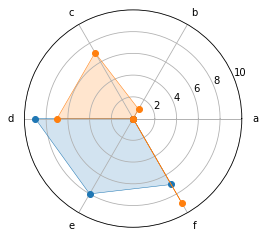

In [86]:
labels = np.array(list('abcdef'))
dataLenth = len(labels)
data1 = np.random.randint(0, 10, 6)
data2 = np.random.randint(0, 10, 6)

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
data1 = np.concatenate((data1, [data1[0]]))
data2 = np.concatenate((data2, [data2[0]]))
angles = np.concatenate((angles, [angles[0]]))

plt.polar(angles, data1, 'o-', linewidth=0.5)
plt.fill(angles, data1, alpha=0.2)
plt.polar(angles, data2, 'o-', linewidth=0.5)
plt.fill(angles, data2, alpha=0.2)

plt.thetagrids(angles*180/np.pi, labels)
plt.ylim(0, 10)

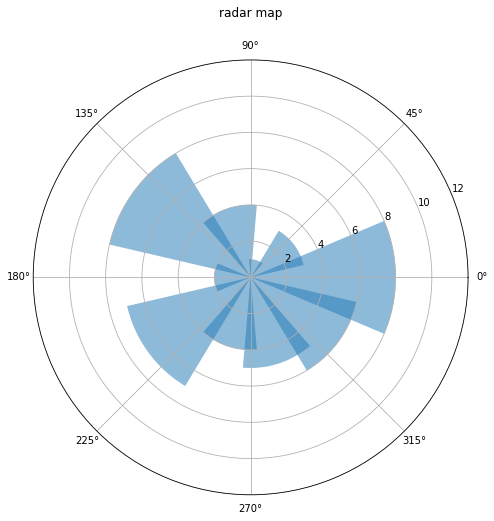

In [93]:
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='polar')
ax1.set_title('radar map\n')
ax1.set_rlim(0, 12)

data = np.random.randint(1, 10, 10)
theta = np.arange(0, 2*np.pi, 2*np.pi/len(data))

bar = ax1.bar(theta, data, alpha=0.5)
# for r, bar in zip(data, bar):
#     bar.set_facecolor(plt.cm.jet(r/10))
# plt.thetagrids(np.arange(0.0, 360.0, 90), [])

# 【课程3.12】  箱型图

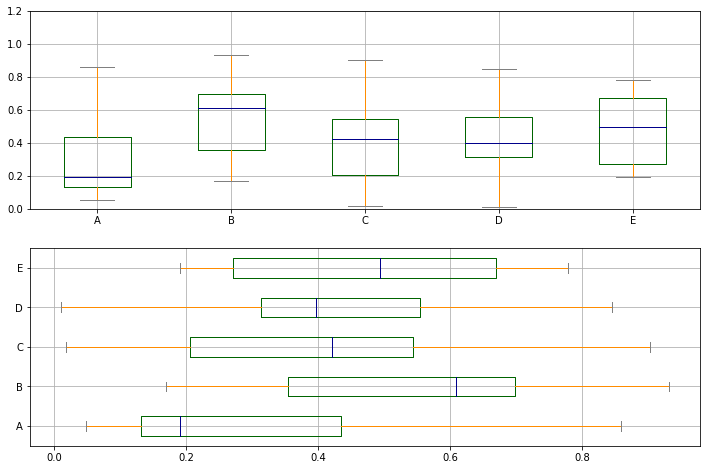

In [103]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
df = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

df.plot.box(ylim=[0, 1.2], grid=True, color=color, ax=axes[0])
df.plot.box(vert=False, positions=[1,2,3,4,5], ax=axes[1], grid=True, color=color)

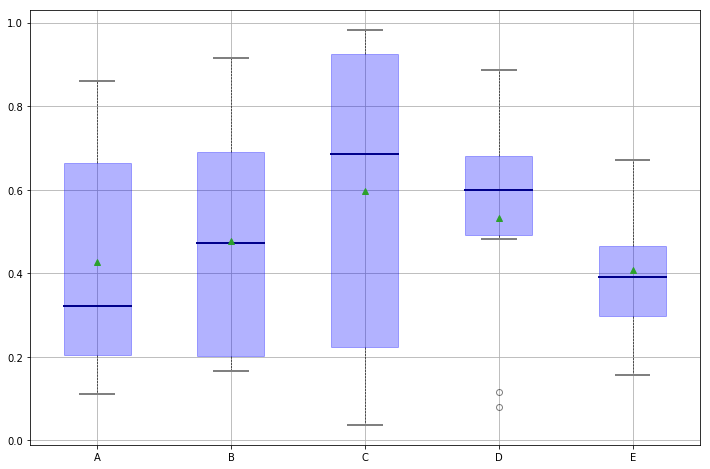

In [121]:
df = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))
plt.figure(figsize=(12, 8))

f = df.boxplot(sym='o', 
               vert=True, 
               whis=1.5, # IQR，默认1.5。[5, 95]强制上下边缘为数据95%和5%
               patch_artist=True, # 是否填充上下四分位框
               meanline=False, 
               showmeans=True, # 是否显示均值
               showbox=True,  # 是否显示边框
               showcaps=True, # 是否显示边缘线
               showfliers=True, 
               notch=False, 
               return_type='dict')
# print(f); print()

for box in f['boxes']:
    box.set(color='b', linewidth=1)
    box.set(facecolor='b', alpha=0.3)
for whisker in f['whiskers']:
    whisker.set(color='k', linewidth=0.6, linestyle='--')
for cap in f['caps']:
    cap.set(color='gray', linewidth=2)
for median in f['medians']:
    median.set(color='DarkBlue', linewidth=2)
for flier in f['fliers']:
    flier.set(marker='o', color='y', alpha=0.5)

       Col1      Col2  X  Y
0  0.282960  0.960877  A  A
1  0.219969  0.143297  A  B
2  0.935115  0.899400  A  A
3  0.265941  0.756052  A  B
4  0.026539  0.834043  A  A


/Users/Ji-personal/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d11fa20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1d347160>], dtype=object)

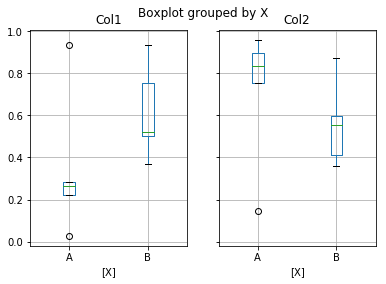

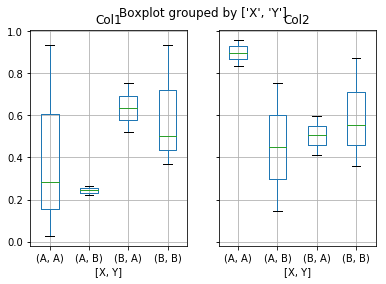

In [123]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
print(df.head())
df.boxplot(by = 'X')
df.boxplot(column=['Col1','Col2'], by=['X','Y'])